<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/predvalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [519]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [520]:
df = pd.read_csv("/content/spi12.csv")
df

,date,maxtemp,rh,surface soil wetness,root zone soil wetness,profile soil moisture,sl1,sl2,sl3,spi12
0,01-04-1981,34.617742,69.223548,0.462258,0.484194,0.479677,-0.183742,-0.614220,-0.429082,0.378890
1,01-05-1981,31.033667,79.617667,0.593333,0.583333,0.568000,0.378890,-0.183742,-0.614220,1.104113
2,01-06-1981,28.703871,84.991935,0.768065,0.737097,0.709355,1.104113,0.378890,-0.183742,1.219897
3,01-07-1981,26.794000,89.955333,0.913667,0.930333,0.904333,1.219897,1.104113,0.378890,0.541595
4,01-08-1981,26.825806,90.236452,0.888065,0.901935,0.869677,0.541595,1.219897,1.104113,0.671709
...,...,...,...,...,...,...,...,...,...,...
484,01-08-2021,27.496129,90.606452,0.879032,0.890323,0.860323,0.464589,0.439844,1.712501,0.561400
485,01-09-2021,27.498387,90.168065,0.863548,0.864839,0.832581,0.561400,0.464589,0.439844,0.774938
486,01-10-2021,27.804667,90.775667,0.886000,0.892000,0.859000,0.774938,0.561400,0.464589,1.487056
487,01-11-2021,27.357097,90.686129,0.945484,0.962258,0.945806,1.487056,0.774938,0.561400,1.473047


In [521]:
del df["date"]

In [522]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [523]:
df.columns

Index(['maxtemp', 'rh', 'surface soil wetness', 'root zone soil wetness',
       ' profile soil moisture', 'sl1', 'sl2', 'sl3', 'spi12'],
      dtype='object')

In [525]:
# Scaling the entire dataset

dataset = df
values = dataset.values

#values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df[['maxtemp', 'rh', 'surface soil wetness', 'root zone soil wetness',
       ' profile soil moisture', 'sl1', 'sl2', 'sl3', 'spi12']])
print(scaled.shape)

(489, 9)


In [527]:
tf = pd.DataFrame(scaled, columns = [['maxtemp', 'rh', 'surface soil wetness', 'root zone soil wetness',
       ' profile soil moisture', 'sl1', 'sl2', 'sl3', 'spi12']])
tf

,maxtemp,rh,surface soil wetness,root zone soil wetness,profile soil moisture,sl1,sl2,sl3,spi12
0,0.749464,0.422834,0.392848,0.131861,0.117296,0.399851,0.280857,0.332033,0.555375
1,0.444210,0.679236,0.554906,0.308057,0.279497,0.555375,0.399851,0.280857,0.755843
2,0.245783,0.811808,0.770939,0.581333,0.539089,0.755843,0.555375,0.399851,0.787849
3,0.083120,0.934244,0.950957,0.924763,0.897158,0.787849,0.755843,0.555375,0.600350
4,0.085829,0.941179,0.919303,0.874293,0.833514,0.600350,0.787849,0.755843,0.636317
...,...,...,...,...,...,...,...,...,...
484,0.142920,0.950306,0.908136,0.853654,0.816335,0.579064,0.572224,0.924015,0.605825
485,0.143112,0.939492,0.888992,0.808363,0.765388,0.605825,0.579064,0.572224,0.664852
486,0.169198,0.954480,0.916751,0.856635,0.813906,0.664852,0.605825,0.579064,0.861697
487,0.131079,0.952272,0.990295,0.981501,0.973322,0.861697,0.664852,0.605825,0.857825


In [529]:
values = tf.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 389

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(389, 1, 8) (389,) (100, 1, 8) (100,)


In [485]:
train.shape, test.shape, values.shape

((390, 8), (100, 8), (490, 8))

In [530]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [531]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=25, validation_split=0.2, verbose=2, shuffle=False)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1000)              4036000   
                                                                 
 dropout_20 (Dropout)        (None, 1000)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 4,037,001
Trainable params: 4,037,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
13/13 - 3s - loss: 0.0951 - val_loss: 0.0495 - 3s/epoch - 260ms/step
Epoch 2/70
13/13 - 1s - loss: 0.0552 - val_loss: 0.0374 - 551ms/epoch - 42ms/step
Epoch 3/70
13/13 - 1s - loss: 0.0470 - val_loss: 0.0338 - 542ms/epoch - 42ms/step
Epoch 4/70
13/13 - 1s - loss: 0.0421 - val_loss: 0.0305 - 553ms

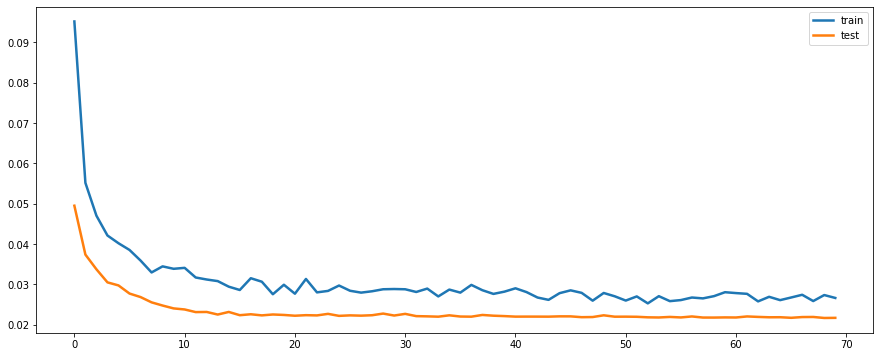

In [532]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [542]:
test_X.shape

(100, 1, 8)

In [543]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(100, 1)
(100,)


In [544]:
y_test_true = test[:,8]

In [244]:
#poll = np.array(df['spi3'])
#print(poll.shape)
#meanop = poll.mean()
#stdop = poll.std()
#print(testPredict.shape)
#y_test_true = y_test_true*stdop + meanop
#testPredict = testPredict*stdop + meanop

#testPredict.shape

(490,)
(100, 1)


(100, 1)

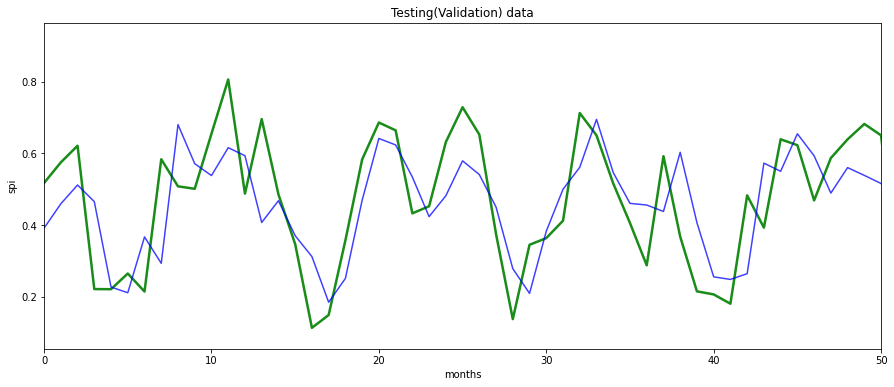

(100,)


In [545]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [546]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

r2socre = 0.5024791286686745
Test(Validation) RMSE = 0.137738692909993


In [547]:
testPredict

array([0.39116466, 0.45910197, 0.5116885 , 0.465202  , 0.22636628,
       0.21053097, 0.36651227, 0.2927836 , 0.6805503 , 0.57120544,
       0.5380405 , 0.61595756, 0.5935313 , 0.40697268, 0.46776506,
       0.36996755, 0.31159332, 0.18401667, 0.25052086, 0.46895942,
       0.64174175, 0.62367207, 0.5339394 , 0.4232666 , 0.4815141 ,
       0.5791869 , 0.54088885, 0.44987124, 0.27790722, 0.20872065,
       0.38245812, 0.4997786 , 0.56119215, 0.6951193 , 0.54650193,
       0.46039683, 0.45569116, 0.43779132, 0.6030891 , 0.40641013,
       0.2549966 , 0.2477205 , 0.26379165, 0.5728279 , 0.5499994 ,
       0.6548582 , 0.5931837 , 0.48909035, 0.5602763 , 0.538505  ,
       0.51591134, 0.44088754, 0.19428109, 0.19252476, 0.20321226,
       0.49079534, 0.61262953, 0.66617996, 0.6008212 , 0.57352483,
       0.4688722 , 0.46203938, 0.4611551 , 0.36109525, 0.2206575 ,
       0.16836375, 0.31556216, 0.37225005, 0.55395633, 0.59855014,
       0.6025278 , 0.59272844, 0.5891277 , 0.4748793 , 0.50301

In [548]:
gf = pd.DataFrame(testPredict) 
gf

,0
0,0.391165
1,0.459102
2,0.511688
3,0.465202
4,0.226366
...,...
95,0.453913
96,0.512457
97,0.540217
98,0.582063


In [549]:
sf = pd.read_csv("/content/test12.csv")

#values = sf.values

#values = values.astype('float32')


sf
scaler = MinMaxScaler(feature_range=(0, 1))
sf = scaler.fit_transform(sf)
sf=pd.DataFrame(sf)
print(sf)
sf[8]=gf
sf


           0         1         2         3         4         5         6  \
0   0.047475  0.946182  0.873467  0.825557  0.788811  0.455179  0.764801   
1   0.108600  0.887871  0.814170  0.727708  0.684040  0.509287  0.455179   
2   0.109383  0.854242  0.800075  0.681014  0.639283  0.578640  0.509287   
3   0.126971  0.787991  0.851839  0.771963  0.726294  0.634797  0.578640   
4   0.148064  0.593310  0.639682  0.506135  0.481822  0.151399  0.634797   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.065350  0.954469  0.888049  0.848160  0.810782  0.583748  0.575494   
96  0.065573  0.941219  0.864719  0.801169  0.758295  0.616040  0.583748   
97  0.095825  0.959583  0.898547  0.851253  0.808280  0.687268  0.616040   
98  0.051617  0.956877  0.988173  0.980807  0.972515  0.924801  0.687268   
99  0.082853  0.918992  1.000000  1.000000  1.000000  0.920128  0.924801   

           7         8  
0   0.924627  0.509287  
1   0.764801  0.578640  
2   0.455179

,0,1,2,3,4,5,6,7,8
0,0.047475,0.946182,0.873467,0.825557,0.788811,0.455179,0.764801,0.924627,0.391165
1,0.108600,0.887871,0.814170,0.727708,0.684040,0.509287,0.455179,0.764801,0.459102
2,0.109383,0.854242,0.800075,0.681014,0.639283,0.578640,0.509287,0.455179,0.511688
3,0.126971,0.787991,0.851839,0.771963,0.726294,0.634797,0.578640,0.509287,0.465202
4,0.148064,0.593310,0.639682,0.506135,0.481822,0.151399,0.634797,0.578640,0.226366
...,...,...,...,...,...,...,...,...,...
95,0.065350,0.954469,0.888049,0.848160,0.810782,0.583748,0.575494,1.000000,0.453913
96,0.065573,0.941219,0.864719,0.801169,0.758295,0.616040,0.583748,0.575494,0.512457
97,0.095825,0.959583,0.898547,0.851253,0.808280,0.687268,0.616040,0.583748,0.540217
98,0.051617,0.956877,0.988173,0.980807,0.972515,0.924801,0.687268,0.616040,0.582063


In [550]:
testPredict=testPredict.reshape(-1,1)
testTrue = scaler.inverse_transform(sf)
testTrue

array([[ 2.73151613e+01,  9.03322581e+01,  8.69354839e-01,
         8.78064516e-01,  8.48709677e-01,  7.91427870e-02,
         1.00738153e+00,  1.48653332e+00, -1.12769879e-01],
       [ 2.79340000e+01,  8.84030000e+01,  8.30000000e-01,
         8.25000000e-01,  7.93333333e-01,  2.41356985e-01,
         7.91427870e-02,  1.00738153e+00,  9.09042246e-02],
       [ 2.79419355e+01,  8.72903226e+01,  8.20645161e-01,
         7.99677419e-01,  7.69677419e-01,  4.49274771e-01,
         2.41356985e-01,  7.91427870e-02,  2.48557018e-01],
       [ 2.81200000e+01,  8.50983333e+01,  8.55000000e-01,
         8.49000000e-01,  8.15666667e-01,  6.17633832e-01,
         4.49274771e-01,  2.41356985e-01,  1.09191934e-01],
       [ 2.83335484e+01,  7.86570968e+01,  7.14193548e-01,
         7.04838710e-01,  6.86451613e-01, -8.31580198e-01,
         6.17633832e-01,  4.49274771e-01, -6.06830652e-01],
       [ 3.21048387e+01,  6.54812903e+01,  4.90322581e-01,
         5.38387097e-01,  5.33225806e-01, -8.328246

In [551]:
gf = pd.DataFrame(testTrue)
gf 

,0,1,2,3,4,5,6,7,8
0,27.315161,90.332258,0.869355,0.878065,0.848710,0.079143,1.007382,1.486533,-0.112770
1,27.934000,88.403000,0.830000,0.825000,0.793333,0.241357,0.079143,1.007382,0.090904
2,27.941935,87.290323,0.820645,0.799677,0.769677,0.449275,0.241357,0.079143,0.248557
3,28.120000,85.098333,0.855000,0.849000,0.815667,0.617634,0.449275,0.241357,0.109192
4,28.333548,78.657097,0.714194,0.704839,0.686452,-0.831580,0.617634,0.449275,-0.606831
...,...,...,...,...,...,...,...,...,...
95,27.496129,90.606452,0.879032,0.890323,0.860323,0.464589,0.439844,1.712501,0.075349
96,27.498387,90.168065,0.863548,0.864839,0.832581,0.561400,0.464589,0.439844,0.250862
97,27.804667,90.775667,0.886000,0.892000,0.859000,0.774938,0.561400,0.464589,0.334085
98,27.357097,90.686129,0.945484,0.962258,0.945806,1.487056,0.774938,0.561400,0.459538
